In [1]:
# NOTE: Run this in Python 2.7
import requests
import urllib
import imdb
import lxml.html
import numpy as np
import pandas as pd
import itertools
%matplotlib inline
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [4]:
movies = pd.read_csv('./all_movies_clean.csv').drop(labels=['Unnamed: 0'], axis=1)

In [57]:
movies.head()

,id,poster_path,title,overview,release_date,popularity,original_title,backdrop_path,keywords,vote_count,vote_average,original_language,genres,genre_ids_cleaned
0,321612,/tWqifoYuwLETmmasnGHO7xBjEtt.jpg,Beauty and the Beast,A live-action adaptation of Disney's version o...,3/17/17,180.451320,Beauty and the Beast,/6aUWe0GSl69wMTSWWexsorMIvwU.jpg,"france,magic,castle,fairy tale,musical,curse,c...",1246,7.1,en,"Fantasy,Music,Romance","14,10402,10749"
1,263115,/45Y1G5FEgttPAwjTYic6czC9xCn.jpg,Logan,"In the near future, a weary Logan cares for an...",2/28/17,117.369877,Logan,/5pAGnkFYSsFJ99ZxDIYnhQbQFXs.jpg,"cyborg,experiment,self-destruction,mutant,futu...",2075,7.6,en,"Action,Drama,Science Fiction","28,18,878"
2,335797,/s9ye87pvq2IaDvjv9x4IOXVjvA7.jpg,Sing,A koala named Buster recruits his best friend ...,11/23/16,80.989984,Sing,/fxDXp8un4qNY9b1dLd7SH6CKzC.jpg,"furry,talking animal,singing,anthropomorphic a...",1007,6.7,en,"Animation,Comedy,Drama,Family,Music","16,35,18,10751,10402"
3,293167,/aoUyphk4nwffrwlZRaOa0eijgpr.jpg,Kong: Skull Island,Explore the mysterious and dangerous home of t...,3/8/17,61.933195,Kong: Skull Island,/pGwChWiAY1bdoxL79sXmaFBlYJH.jpg,"monster,expedition,island,prequel,king kong,ka...",876,6.1,en,"Science Fiction,Action,Adventure,Fantasy","878,28,12,14"
4,135397,/jjBgi2r5cRt36xF6iNUEhzscEcb.jpg,Jurassic World,Twenty-two years after the events of Jurassic ...,6/9/15,51.976724,Jurassic World,/dkMD5qlogeRMiEixC4YNPUvax2T.jpg,"monster,dna,tyrannosaurus rex,velociraptor,isl...",6699,6.5,en,"Action,Adventure,Science Fiction,Thriller","28,12,878,53"


In [16]:
keyword_counts = []
for i in range(movies.shape[0]):
    if 'nan' not in str(movies['keywords'][i]):
        count = len(movies['keywords'][i].split(','))
    keyword_counts.append(count)

In [26]:
keywords = []
for i in range(movies.shape[0]):
    if 'nan' not in str(movies['keywords'][i]):
        keywords = keywords + movies['keywords'][i].split(',')

In [30]:
words, counts = np.unique(keywords, return_counts=True)

In [43]:
vals = zip(words, counts)
sorted_vals = sorted(vals, key = lambda t: t[1], reverse=True)

In [44]:
sorted_vals

[('woman director', 649),
 ('independent film', 471),
 ('murder', 418),
 ('based on novel', 362),
 ('sex', 356),
 ('duringcreditsstinger', 321),
 ('violence', 276),
 ('nudity', 271),
 ('sequel', 259),
 ('revenge', 235),
 ('love', 226),
 ('suspense', 226),
 ('female nudity', 225),
 ('biography', 210),
 ('aftercreditsstinger', 192),
 ('dystopia', 192),
 ('friendship', 186),
 ('sport', 181),
 ('police', 179),
 ('teenager', 171),
 ('musical', 164),
 ('high school', 145),
 ('prison', 143),
 ('drug', 141),
 ('family', 132),
 ('los angeles', 130),
 ('martial arts', 130),
 ('paris', 130),
 ('world war ii', 130),
 ('alien', 124),
 ('new york', 122),
 ('dying and death', 121),
 ('rape', 118),
 ('based on comic book', 112),
 ('suicide', 112),
 ('monster', 107),
 ('superhero', 107),
 ('daughter', 104),
 ('male nudity', 102),
 ('war', 102),
 ('3d', 101),
 ('blood', 101),
 ('death', 101),
 ('escape', 99),
 ('father son relationship', 99),
 ('serial killer', 99),
 ('detective', 97),
 ('robbery', 97),

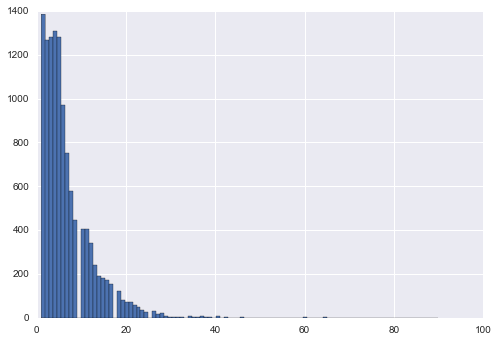

In [22]:
plt.hist(keyword_counts, bins=100)
plt.show()

In [67]:
movies_keywords = pd.DataFrame(columns=words)

In [68]:
movies_keywords.head()

,,casusluk,new york city,nigerian cinema,007,12th century,15th birthday,15th century,16th century,17th century,...,Γη,卧底肥妈,岩井俊二,恐怖,绝地奶霸,超级妈妈,변호인,소원,푸른소금,형사 duelist


In [81]:
movies_keywords_df = pd.DataFrame({keywords: movies['keywords'].values, ids:movies['id'].values})

TypeError: unhashable type: 'list'

In [77]:
n = movies_keywords.shape[1]
for i in range(movies.shape[0]):
    one_hot_vector = np.zeros((n,1))
    keywords = movies['keywords'][i].split(',')
    for j, w in enumerate(words):
        if w in keywords:
            one_hot_vector[j] = 1
    print one_hot_vector.reshape((-1,1))
    movies_keywords.iloc[i] = one_hot_vector

[[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]


IndexError: single positional indexer is out-of-bounds